Take synthetic rho data and attempt outlier detection with one other type of a synthetic lightcurve; sine, flat, box function, inverted rho etc (an obvious outlier).

Sine wave results generated by synthetic_classes.py:

no. clusters:  150 segment length:  10
Mean rho error: 	 193.25615050380583 Max rho error:  385.1753621481247


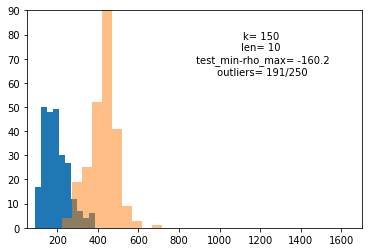

Mean test error: 	 425.37242546469383
Min test-max rho error:  -160.15361326048918
no. misclassified observations:  59

no. clusters:  150 segment length:  20
Mean rho error: 	 234.62346069774108 Max rho error:  453.63884559597375


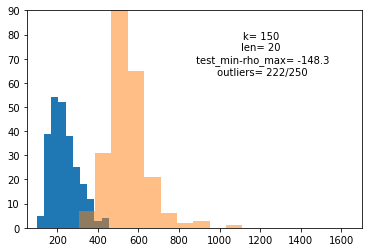

Mean test error: 	 541.5406325274444
Min test-max rho error:  -148.3472496590956
no. misclassified observations:  28

no. clusters:  150 segment length:  30
Mean rho error: 	 275.50381193060105 Max rho error:  528.0518492099513


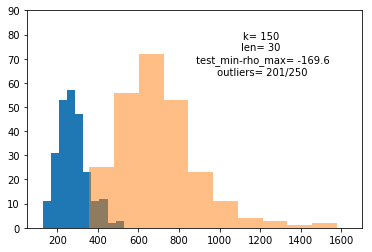

Mean test error: 	 699.3595250237767
Min test-max rho error:  -169.56439828099923
no. misclassified observations:  49

no. clusters:  150 segment length:  40
Mean rho error: 	 314.48624430004566 Max rho error:  626.4093196376944


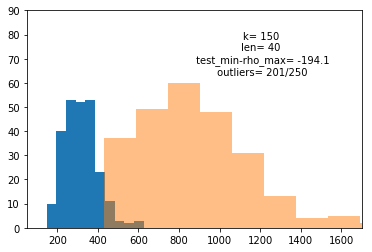

Mean test error: 	 877.8529184550251
Min test-max rho error:  -194.10294674793943
no. misclassified observations:  49

no. clusters:  200 segment length:  10
Mean rho error: 	 186.19308838089486 Max rho error:  366.73051558185665


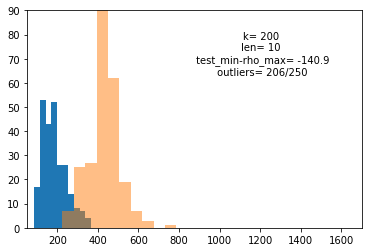

Mean test error: 	 430.38601904295535
Min test-max rho error:  -140.92776760021056
no. misclassified observations:  44

no. clusters:  200 segment length:  20
Mean rho error: 	 223.48071860671257 Max rho error:  409.8278751298711


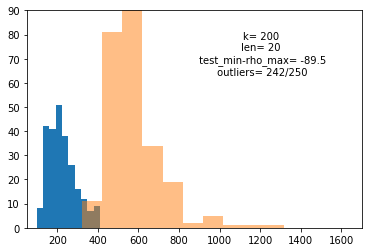

Mean test error: 	 574.408684254976
Min test-max rho error:  -89.51115786604385
no. misclassified observations:  8

no. clusters:  200 segment length:  30
Mean rho error: 	 261.4145209362561 Max rho error:  531.5301152112455


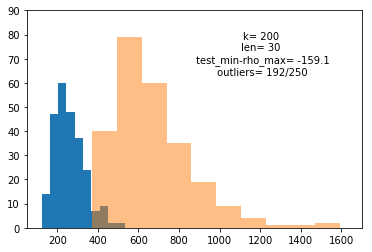

Mean test error: 	 668.1393692777494
Min test-max rho error:  -159.06570132611358
no. misclassified observations:  58

no. clusters:  200 segment length:  40
Mean rho error: 	 302.2164017335051 Max rho error:  610.5984574715819


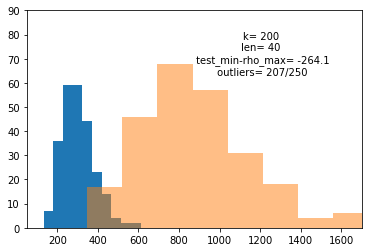

Mean test error: 	 882.8326229758768
Min test-max rho error:  -264.10258814915284
no. misclassified observations:  43

no. clusters:  250 segment length:  10
Mean rho error: 	 181.83928153205088 Max rho error:  376.71986641370086


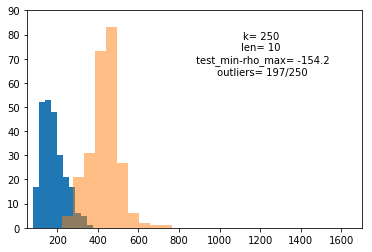

Mean test error: 	 432.0879243089
Min test-max rho error:  -154.17906428671895
no. misclassified observations:  53

no. clusters:  250 segment length:  20
Mean rho error: 	 220.50501017648642 Max rho error:  414.80881750602884


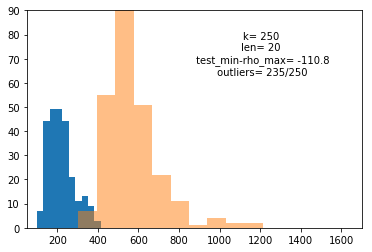

Mean test error: 	 572.4479936312314
Min test-max rho error:  -110.7769543790165
no. misclassified observations:  15

no. clusters:  250 segment length:  30
Mean rho error: 	 254.79759062021708 Max rho error:  529.328058807083


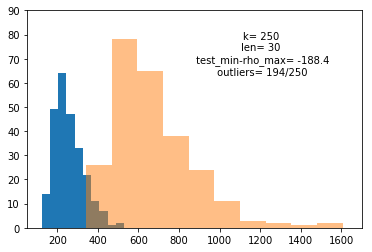

Mean test error: 	 671.3712529380078
Min test-max rho error:  -188.40566067820225
no. misclassified observations:  56

no. clusters:  250 segment length:  40
Mean rho error: 	 288.0517767827215 Max rho error:  588.6324997320123


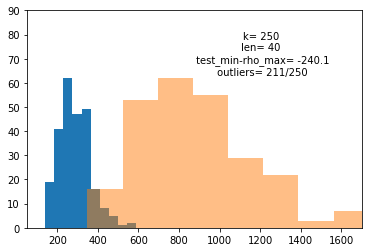

Mean test error: 	 884.7547648655716
Min test-max rho error:  -240.05916248862627
no. misclassified observations:  39



In [33]:
#sine waves
results=np.loadtxt("valid_results_20190520_sine.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        plt.xlim([50,1700])
        plt.ylim([0,90])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

In [171]:
results=np.loadtxt("results/valid_results_20190510_sine.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
worst_rho=[]
best_test=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=train[(train[:,-1]==np.max(train[:,-1]))][0]
        worst_rho.append(max_rho[3])
        #print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=test[(test[:,-1]==np.min(test[:,-1]))][0]
        best_test.append(min_test[3])

no. clusters:  150 segment length:  10
no. clusters:  150 segment length:  20
no. clusters:  150 segment length:  30
no. clusters:  150 segment length:  40
no. clusters:  200 segment length:  10
no. clusters:  200 segment length:  20
no. clusters:  200 segment length:  30
no. clusters:  200 segment length:  40
no. clusters:  250 segment length:  10
no. clusters:  250 segment length:  20
no. clusters:  250 segment length:  30
no. clusters:  250 segment length:  40


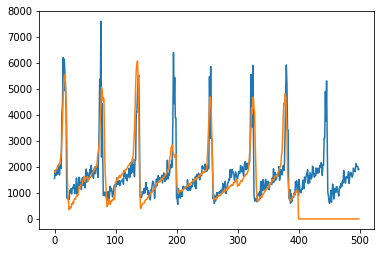

745.4705731821161


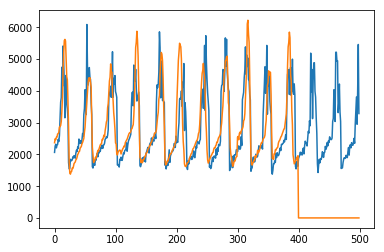

840.0877107211973


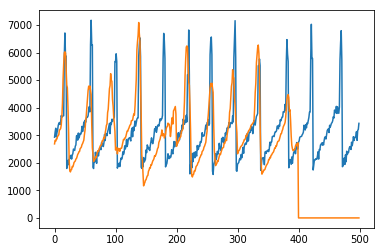

1054.3710758923191


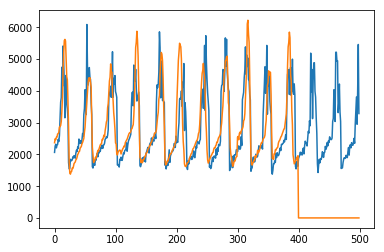

840.0877107211973


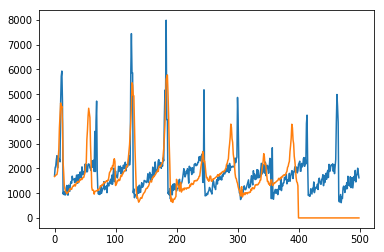

841.8138154039939


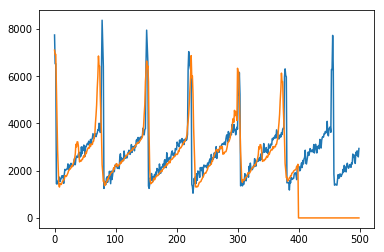

881.155587411444


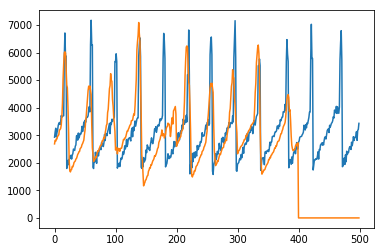

1054.3710758923191


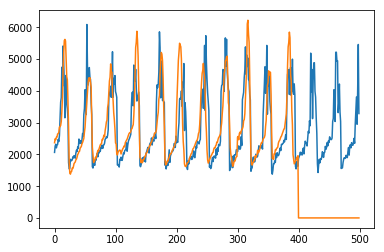

840.0877107211973


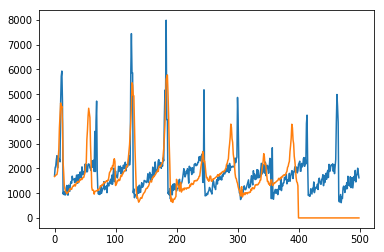

841.8138154039939


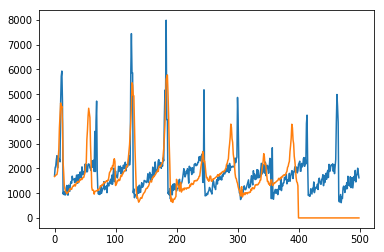

841.8138154039939


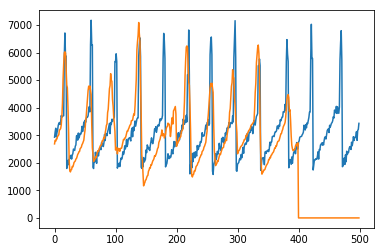

1054.3710758923191


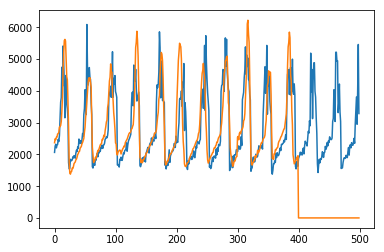

840.0877107211973


In [182]:
for rho in worst_rho:
    rho=rho_valid[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)

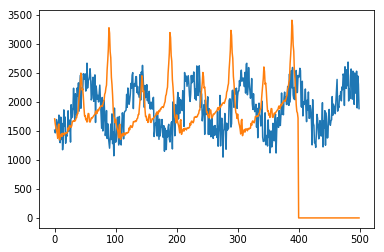

566.6417208537422


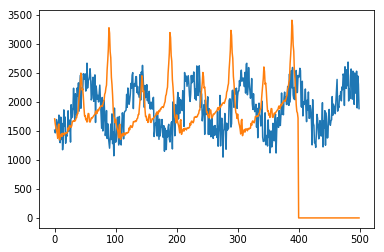

566.6417208537422


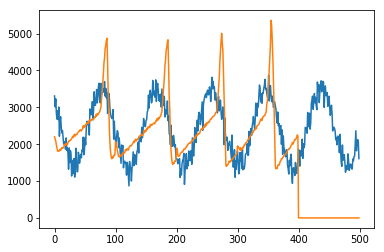

699.682541858134


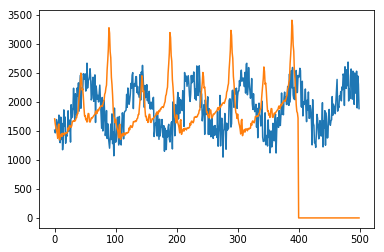

566.6417208537422


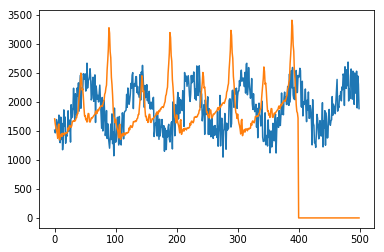

566.6417208537422


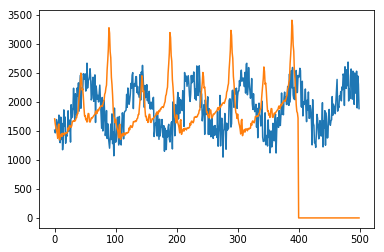

566.6417208537422


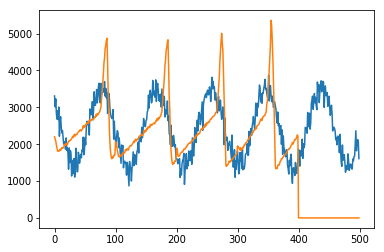

699.682541858134


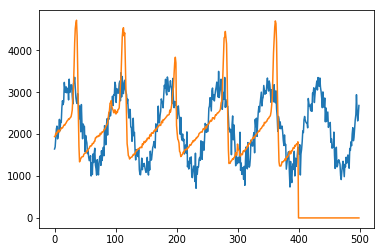

644.4414685920461


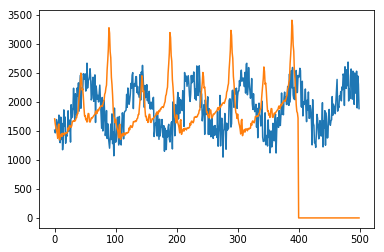

566.6417208537422


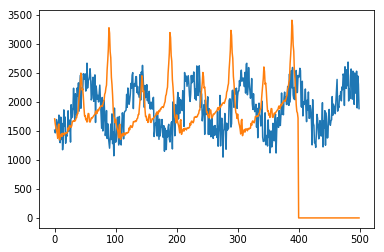

566.6417208537422


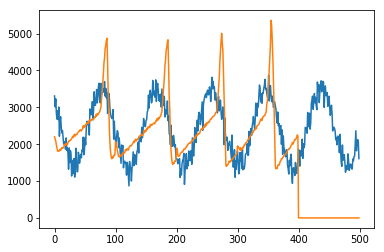

699.682541858134


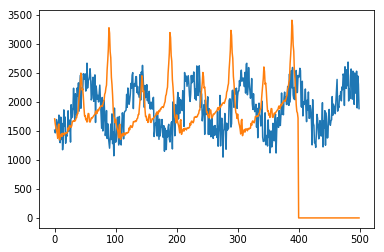

566.6417208537422


In [183]:
for rho in best_test:
    rho=sines[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


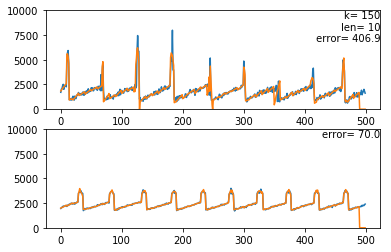

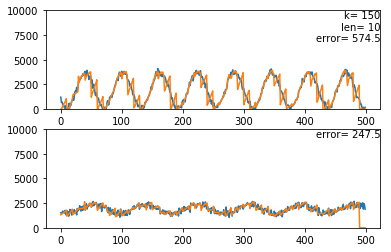

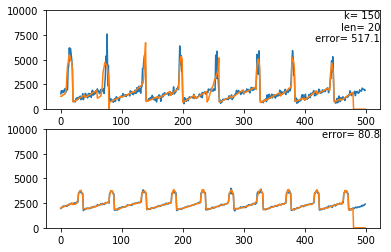

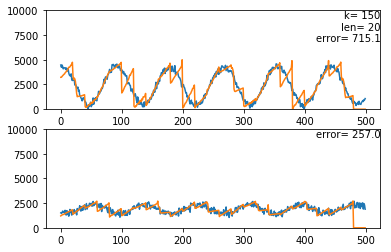

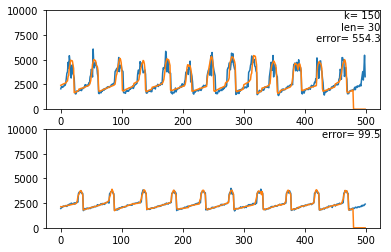

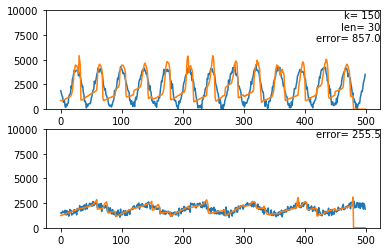

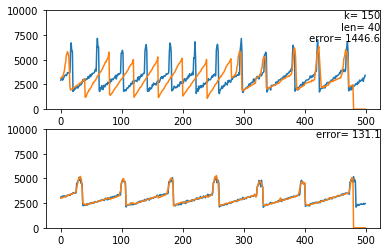

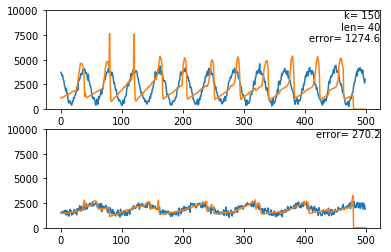

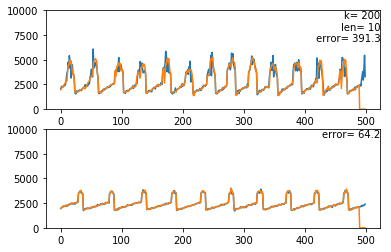

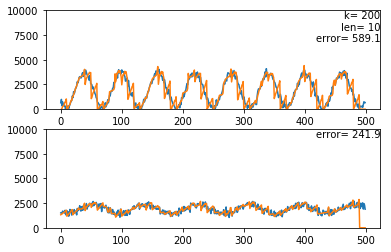

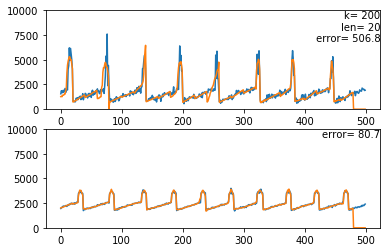

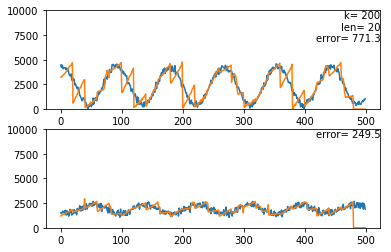

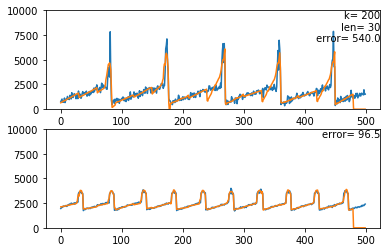

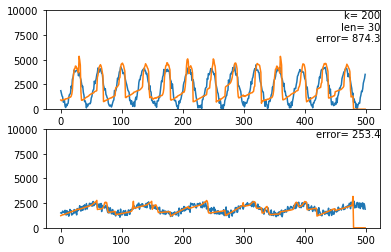

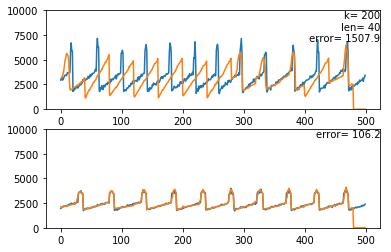

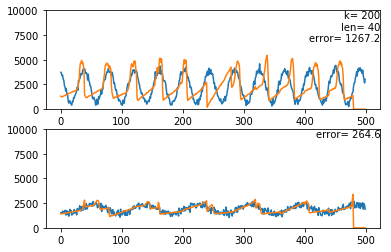

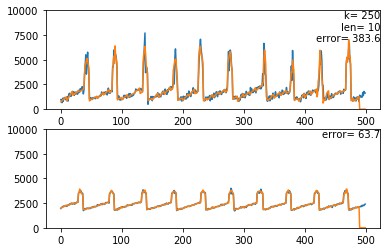

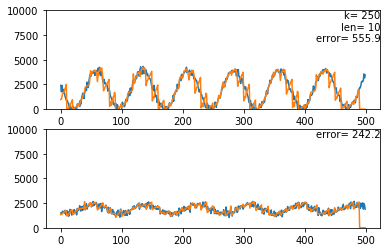

In [ ]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

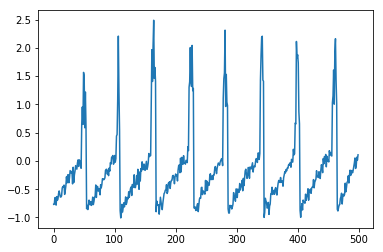

In [46]:
from scipy.stats import zscore
plt.plot(zscore(rho_file)[30])
